# E-tivity 3 - Clustering and Manifold

### Student details
* Name: Dylan Butler
* Number:21218684

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [273]:
df = pd.read_csv("./data/loans_train_prepared-1.csv")
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (614, 16)


In [274]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [275]:
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

In [276]:
#X=np.array(df.drop(['Loan_Status_Y'], axis=1), dtype=float)
X=np.array(df, dtype=float)
#X=np.append(X_, rescalled, axis=1)
y=df[['Loan_Status_Y']]

### Task 2 (A):
1. Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 
2. Use the Elbow method to pick the best value of k. 
3. Attempt also another method for determining the best value of k. 
4. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.

(1) plotting sum squared errors

In [277]:
sum_sqrd_errs = {}
for k in range(1, 10):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=10000, random_state=42).fit(X)
    sum_sqrd_errs[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

C:\Users\dbc14\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


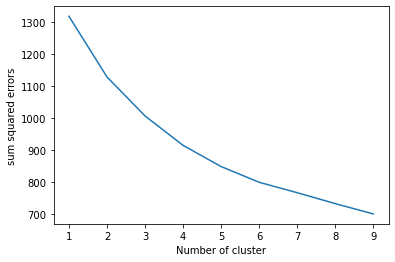

In [278]:
plt.figure()
plt.plot(list(sum_sqrd_errs.keys()), list(sum_sqrd_errs.values()))
plt.xlabel("Number of cluster")
plt.ylabel("sum squared errors")
plt.show()

__(2) find best value of k - elbow method__:
> It is obvious from the graph above that there is no clear indicator as to where the optimal k value is according to the *elbow theory*. The sum of squared errors vs number of clusters produces a smooth curve. Try get the rate of change between points to find the greatest slope

##### Plot the rate of change

In [279]:
vals=np.array(list(sum_sqrd_errs.values()))

In [280]:
roc=np.diff(vals) / np.abs(vals[:-1]) * 100
roc=np.insert(roc, 0, -20)

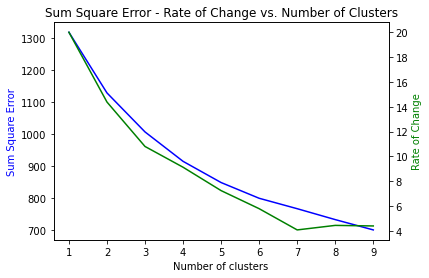

In [281]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(list(sum_sqrd_errs.keys()), list(sum_sqrd_errs.values()), 'b-')
ax2.plot(list(sum_sqrd_errs.keys()), list(abs(roc)), 'g-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum Square Error', color='b')
ax2.set_ylabel('Rate of Change', color='g')
plt.title('Sum Square Error - Rate of Change vs. Number of Clusters')
plt.show()

if we observe the above plot we see the first noticable shift in the rate of change is @ cluster=3 and cluster=7. We can generate kmeans model using this value for k and observe the results

__(3) Silhouette Method__

*Important*:#
* The Silhouette coefficient of +1 indicates that the sample is far away from the neighboring clusters.
* The Silhouette coefficient of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
* Silhouette coefficient <0 indicates that those samples might have been assigned to the wrong cluster or are outliers.

In [282]:
from sklearn.metrics import silhouette_score

In [283]:
sill_coefs_euc = {}
sill_coefs_cb = {}
sill_coefs_cos = {}
sill_coefs_l1 = {}

for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=10000, random_state=42).fit(X)
    labels = kmeans.labels_
    sill_coefs_euc[k] = silhouette_score(X, labels, metric='euclidean')
    sill_coefs_cb[k] = silhouette_score(X, labels, metric='cityblock')
    sill_coefs_cos[k] = silhouette_score(X, labels, metric='cosine')
    sill_coefs_l1[k] = silhouette_score(X, labels, metric='l1')

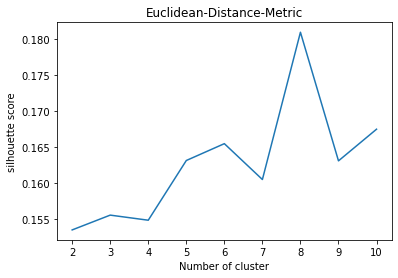

In [284]:
plt.figure()
plt.plot(list(sill_coefs_euc.keys()), list(sill_coefs_euc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.title('Euclidean-Distance-Metric')
plt.show()

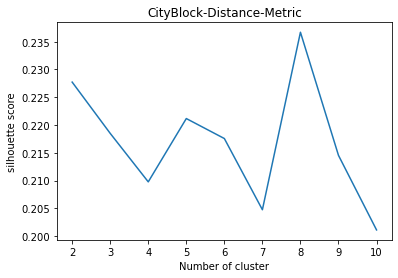

In [285]:
plt.figure()
plt.plot(list(sill_coefs_cb.keys()), list(sill_coefs_cb.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.title('CityBlock-Distance-Metric')
plt.show()

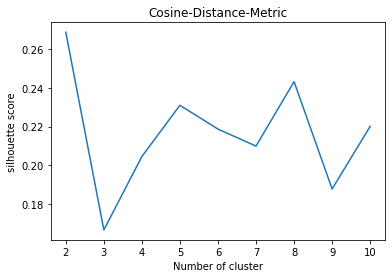

In [286]:
plt.figure()
plt.plot(list(sill_coefs_cos.keys()), list(sill_coefs_cos.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.title('Cosine-Distance-Metric')
plt.show()

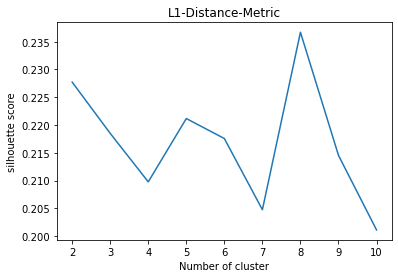

In [287]:
plt.figure()
plt.plot(list(sill_coefs_l1.keys()), list(sill_coefs_l1.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.title('L1-Distance-Metric')
plt.show()

#### Initial Analysis (without target variable - Loan_status)
According to the silhouette method using the various distance measures it seems to be pointing toward 2 as the optimal k-value. Every graph other than the euclidean distance seems to be pointing to this.

#### With the target variable included:
Intersting how the optimal k-value has now shifted to 8 (other than cosine which has remained at 2) when we included the target variable in the analysis.

__(4) Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.__

In [288]:
def fit_kmeans(data, k):
    kms = cluster.KMeans(n_clusters=k, max_iter=10000, random_state=42).fit(data)
    return kms

In [289]:
k=2
model=fit_kmeans(X, k)

In [290]:
model.inertia_

1127.6180114587291

### Task 2 (B):
* Use at least two different methods for visualising the clustering. 
* Write a short conclusion about the characteristics of the clusters 

In [291]:
clrs = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=clrs[i%clrs.size],
                        label = 'cluster '+str(i))
    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    #_ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [292]:
data_and_centers = np.r_[X, model.cluster_centers_]

#### Apply Manifold-Learning: MDS

In [293]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


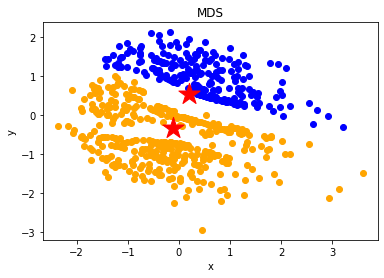

In [294]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=model.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

MDS has clustered the 2 groups extremely well. lets retrain with k=3 and see what happens

In [295]:
k=3
model_1=fit_kmeans(X, k)
print(model_1.inertia_)

data_and_centers_1 = np.r_[X, model_1.cluster_centers_]
XYcoordinates_1 = manifold.MDS(n_components=2).fit_transform(data_and_centers_1)
print("transformation complete")

1005.8528230130029
transformation complete


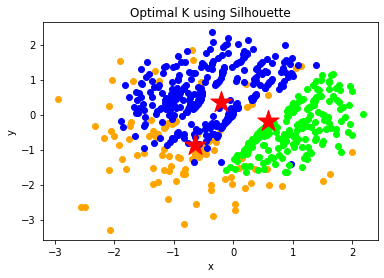

In [296]:
clustering_scatterplot(points=XYcoordinates_1[:-k,:], 
                       labels=model_1.labels_, 
                       centers=XYcoordinates_1[-k:,:], 
                       title='Optimal K using Silhouette')

Here we generated 3 clustered that seems very squashed - hard to tell boundaries between them. Let's try another technique

#### Apply Spectral Embedding

In [299]:
k=8
model_8=fit_kmeans(X, k)
print(model_8.inertia_)

data_and_centers_8 = np.r_[X, model_8.cluster_centers_]
#try with two clusters
XYcoordinates_8=manifold.SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ).fit_transform(data_and_centers_8)

732.1911761961587


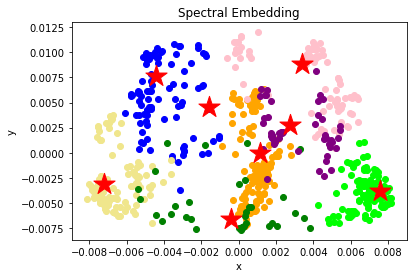

In [300]:
clustering_scatterplot(points=XYcoordinates_8[:-k,:], 
                       labels=model_8.labels_, 
                       centers=XYcoordinates_8[-k:,:], 
                       title='Spectral Embedding')

Spectral Embedding has done a nice job at separating the clusters but there seems to still be a lot of overlap

In [301]:
k=3
#try with two clusters
XYcoordinates_3=manifold.SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ).fit_transform(data_and_centers_1)

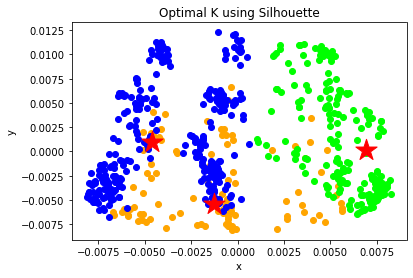

In [302]:
clustering_scatterplot(points=XYcoordinates_3[:-k,:], 
                       labels=model_1.labels_, 
                       centers=XYcoordinates_3[-k:,:], 
                       title='Optimal K using Silhouette')

In [303]:
model_1.inertia_

1005.8528230130029

### K=8 (optimal according to silhouette)

In [304]:
k=8
model_4=fit_kmeans(X, k)
print(model_4.inertia_)

data_and_centers_4 = np.r_[X, model_4.cluster_centers_]
XYcoordinates_4 = manifold.MDS(n_components=2).fit_transform(data_and_centers_4)
print("transformation complete")

732.1911761961587
transformation complete


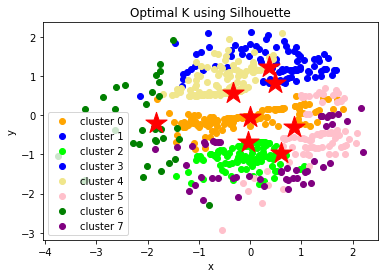

In [33]:
clustering_scatterplot(points=XYcoordinates_4[:-k,:], 
                       labels=model_4.labels_, 
                       centers=XYcoordinates_4[-k:,:], 
                       title='Optimal K using Silhouette')

### Task 2 Analysis
* Use at least two different methods for visualising the clustering. 
* Write a short conclusion about the characteristics of the clusters

> the two methods that I used for visualising clustering was (1)multi-dimensional scaling and (2)SpectralEmbedding. We can see that the specteral embedding seems to do a better job at generating distance between the clusters compared to MDS - tends to be more squashed. The clusters seem to be overlapping each other this is probably due to the transformation into a higher dimensional space. if we plotted a 3d graph the separations would be a lot better I'm guessing. According to the silhouette scoring the optimal number of clusters was 8

## DBSCAN experiments
> lets just run the dbscan class with the default params and analyse the result

### Use Silhouette method to try and determine best params

C:\Users\dbc14\AppData\Local\Temp/ipykernel_30780/4074284250.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(eps_sample, sil, 'bo-', color='black')


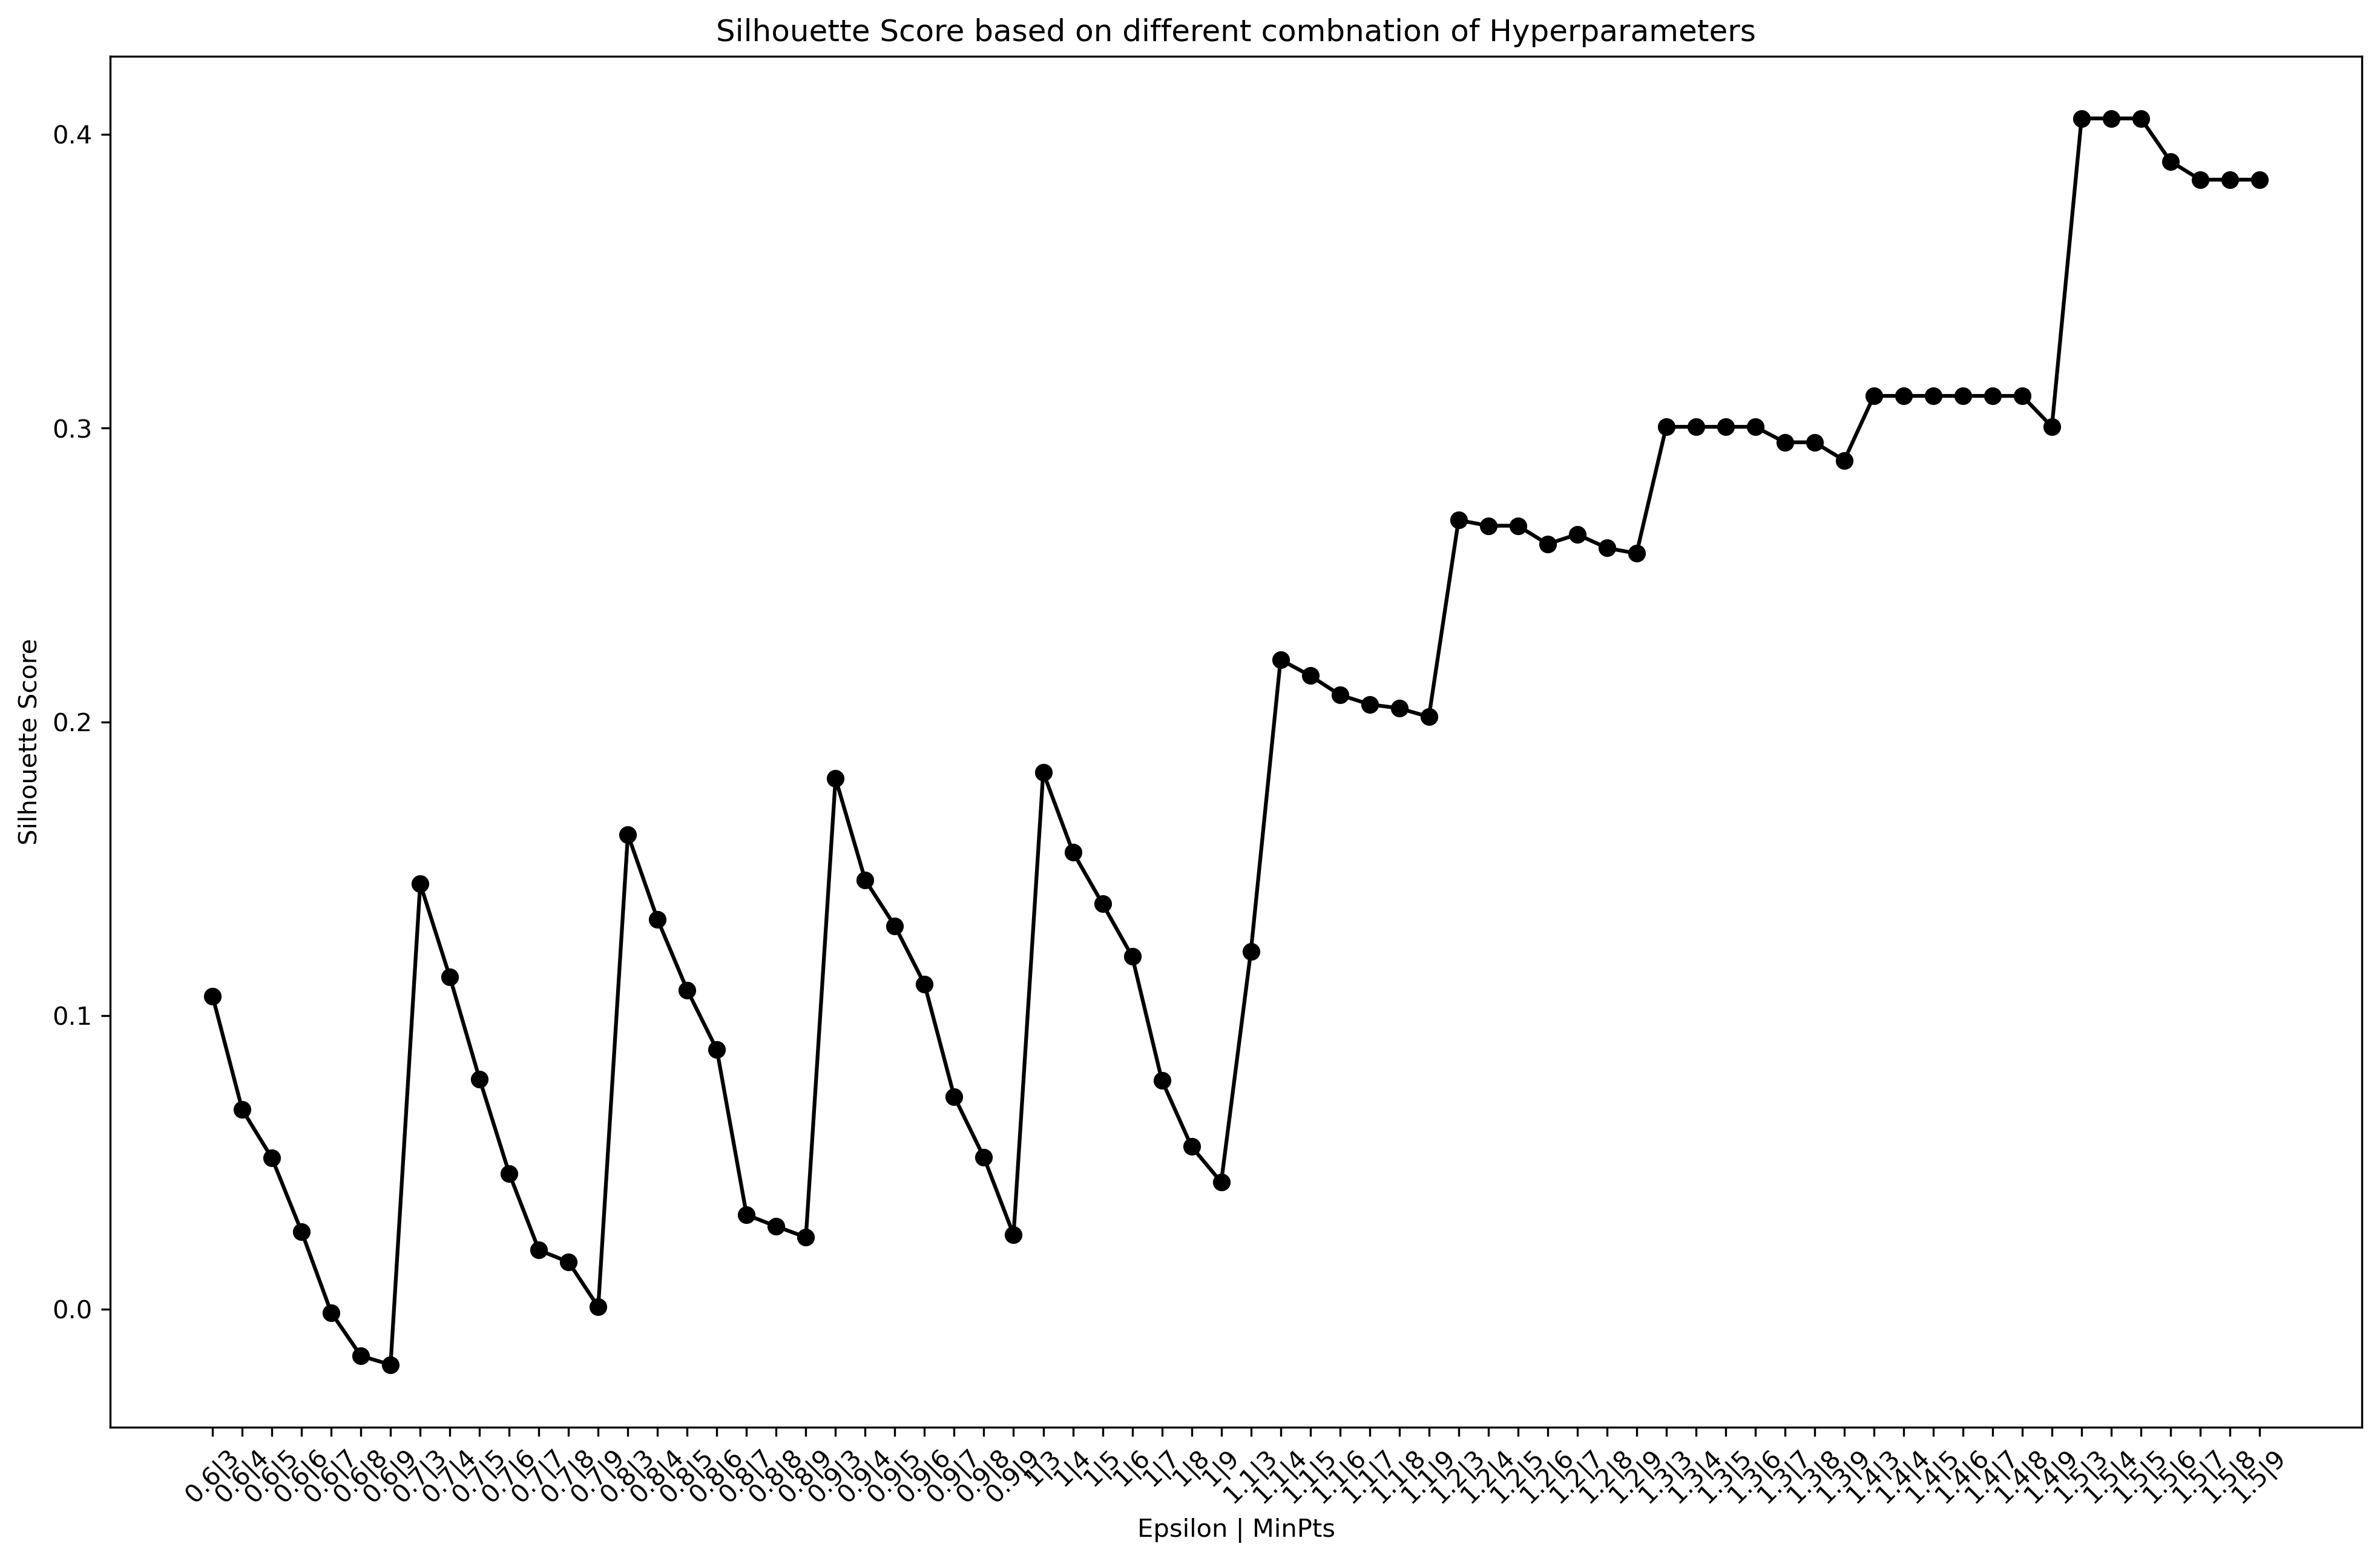

In [179]:
sil=[]
eps_sample=[]


eps_range=[0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
minpts_range=range(3,10)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = cluster.DBSCAN(eps=k, min_samples=j)
        # Fit the model 
        model.fit(X)
        if len(np.unique(model.labels_))==1:
            continue
        # Calculate Silhoutte Score and append to a list
        sil.append(metrics.silhouette_score(X, model.labels_, metric='euclidean'))
        eps_sample.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,10), dpi=300)
plt.plot(eps_sample, sil, 'bo-', color='black')
plt.xlabel('Epsilon | MinPts')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

from the graph we can see that:
* epsilon=1.5
* minimum points=4

produced the best silhouette score 

In [259]:
#only seem to be getting 1 cluster with the best silhouette score
db = cluster.DBSCAN(eps=0.9, min_samples=7).fit(X)

In [260]:
len(np.unique(db.labels_))

22

In [261]:
from sklearn import metrics

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 21
Estimated number of noise points: 255
Silhouette Coefficient: 0.072


### Use PCA to transform the data

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xy_pca=pca.fit_transform(X)

In [263]:
clusters = db.labels_

In [264]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20], dtype=int64)

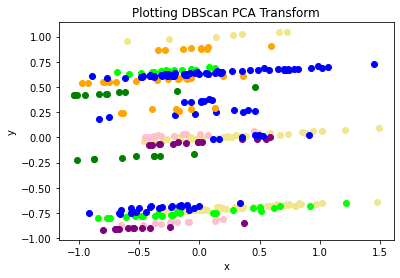

In [265]:
clustering_scatterplot(points=Xy_pca, 
                       labels=db.labels_, 
                       centers=None, 
                       title='Plotting DBScan PCA Transform')

In [266]:
#USE MDS
XYcoordinates_6 = manifold.MDS(n_components=2).fit_transform(X)

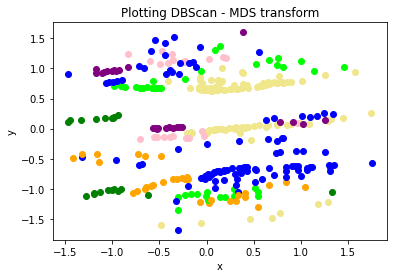

In [267]:
clustering_scatterplot(points=XYcoordinates_6, 
                       labels=db.labels_, 
                       centers=None, 
                       title='Plotting DBScan - MDS transform')

In [268]:
XYcoordinates_7=manifold.SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ).fit_transform(X)

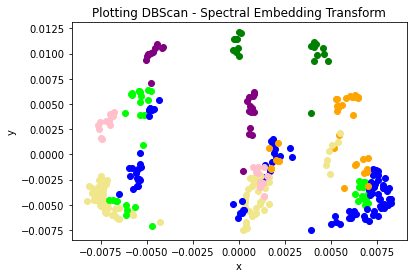

In [269]:
clustering_scatterplot(points=XYcoordinates_7, 
                       labels=db.labels_, 
                       centers=None, 
                       title='Plotting DBScan - Spectral Embedding Transform')

## Task 3 Analysis
* Second clustering algorithm attempted successfully and compared to k-Means. 
* Sufficient exploration of the parameters of the second clustering algorithm.
* Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell)
* visualising the clusterings with an appropriate manifold-learning technique.

### DBSCAN 
> takes in a epsilon value as an argument and also specifies a minimum number of samples in a cluster. It will then head off and attempt to determine the number of clusters automatically. However, DBScan is extremely sensitive to scaling. We can see from the silhouette graph that the larger value for epsilon generates a better score however, when we use this value it drops the number of clusters to 1/2 max. in order to generate a couple more clusters I lowered the epsilon. I then attempted to apply PCA Which generates these lines of clusters which is very interesting.However, I found the SPectral embedding seemed to work the best!